### This Task performed as a part of cellula Internship 

#### Coded by

1. Omar Mamon Hamed
2. Habiba Mowafy

---

##### 1- Importing lib needed 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

##### 2- Data reading & information gathering

In [2]:
data = pd.read_csv('first inten project.csv')
data.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [4]:
# Rename unclear columns
data.rename(columns={
    'P-C': 'Previously Canceled',
    'P-not-C': 'Previously not Canceled',
    'repeated': 'Old Customer',
    'average price ': 'average price',
}, inplace=True)
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,Old Customer,Previously Canceled,Previously not Canceled,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [5]:
#checking for missing values
data.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
Old Customer                0
Previously Canceled         0
Previously not Canceled     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [6]:
#no of unique values in each feature
data.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
Old Customer                    2
Previously Canceled             9
Previously not Canceled        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

In [7]:
# discovering the unique values of the columns
checked_columns = ['type of meal', 'room type', 'market segment type']
for column in checked_columns:
    print(column)
    print(data[column].unique())
    print("----------------")

type of meal
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
----------------
room type
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
----------------
market segment type
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
----------------


In [8]:
#Define a function to check if the date is in the correct format

def is_valid_date_format(date):
    if pd.isna(date):
        return False
    # Pattern for MM/D/YYYY or M/D/YYYY
    pattern = r'^\d{1,2}/\d{1,2}/\d{4}$'
    return bool(re.match(pattern, str(date)))

In [9]:
#Extract invalid dates
invalid_dates = data[~data['date of reservation'].apply(is_valid_date_format)]

print(f"Number of invalid dates: {len(invalid_dates)}")
print("\nExamples of invalid dates:")
print(invalid_dates['date of reservation'].head(20))

Number of invalid dates: 37

Examples of invalid dates:
2626     2018-2-29
3677     2018-2-29
5600     2018-2-29
6343     2018-2-29
7648     2018-2-29
8000     2018-2-29
8989     2018-2-29
9153     2018-2-29
9245     2018-2-29
9664     2018-2-29
9934     2018-2-29
10593    2018-2-29
10652    2018-2-29
10747    2018-2-29
11881    2018-2-29
13958    2018-2-29
14304    2018-2-29
15363    2018-2-29
15438    2018-2-29
17202    2018-2-29
Name: date of reservation, dtype: object


In [10]:
# Display statistics of the dataset
data.describe(include='all')


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,Old Customer,Previously Canceled,Previously not Canceled,average price,special requests,date of reservation,booking status
count,36285,36285.000000,36285.000000,36285.000000,36285.000000,36285,36285.000000,36285,36285.000000,36285,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285,36285
unique,36285,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,NaN,NaN,NaN,NaN,NaN,553,2
top,INN36286,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,Online,NaN,NaN,NaN,NaN,NaN,10/13/2018,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27842,NaN,28138,NaN,23221,NaN,NaN,NaN,NaN,NaN,254,24396
mean,NaN,1.844839,0.105360,0.810693,2.204602,NaN,0.030977,NaN,85.239851,NaN,0.025630,0.023343,0.153369,103.421636,0.619733,NaN,NaN
std,NaN,0.518813,0.402704,0.870590,1.410946,NaN,0.173258,NaN,85.938796,NaN,0.158032,0.368281,1.753931,35.086469,0.786262,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN,NaN


##### 3- Data Cleaning

In [11]:
# convert date of reservation to datetime format and check for nulls
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')
print(f"Number of null valus: {data['date of reservation'].isnull().sum()}")


Number of null valus: 37


In [12]:
# Show rows where 'date of reservation' is null
data[data['date of reservation'].isnull()][['date of reservation']].head(8)

# get index of rows where 'date of reservation' is null
null_date_indices = data[data['date of reservation'].isnull()].index

# show the values of the 'date of reservation' column for the rows with null values
data.loc[null_date_indices, 'date of reservation'].head(20)


2626    NaT
3677    NaT
5600    NaT
6343    NaT
7648    NaT
8000    NaT
8989    NaT
9153    NaT
9245    NaT
9664    NaT
9934    NaT
10593   NaT
10652   NaT
10747   NaT
11881   NaT
13958   NaT
14304   NaT
15363   NaT
15438   NaT
17202   NaT
Name: date of reservation, dtype: datetime64[ns]

In [13]:
# drop null values in date of reservation and store in another dataframe
data_cleaned = data.dropna(subset=['date of reservation']).copy()
data_cleaned['date of reservation'].head()

0   2015-10-02
1   2018-11-06
2   2018-02-28
3   2017-05-20
4   2018-04-11
Name: date of reservation, dtype: datetime64[ns]

In [14]:
# Extract the year, month, and day from the date of reservation
data_cleaned['reservation_year'] = data_cleaned['date of reservation'].dt.year
data_cleaned['reservation_month'] = data_cleaned['date of reservation'].dt.month
data_cleaned['reservation_day'] = data_cleaned['date of reservation'].dt.day

# Drop the date of reservation column
data_cleaned.drop('date of reservation', axis=1, inplace=True)

# Display the first few rows of the encoded dataframe
data_cleaned.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,Old Customer,Previously Canceled,Previously not Canceled,average price,special requests,booking status,reservation_year,reservation_month,reservation_day
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2015,10,2
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018,11,6
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2018,2,28
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,2017,5,20
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,2018,4,11


##### 4- Checking outliers

Text(0.5, 1.0, 'Lead Time Boxplot')

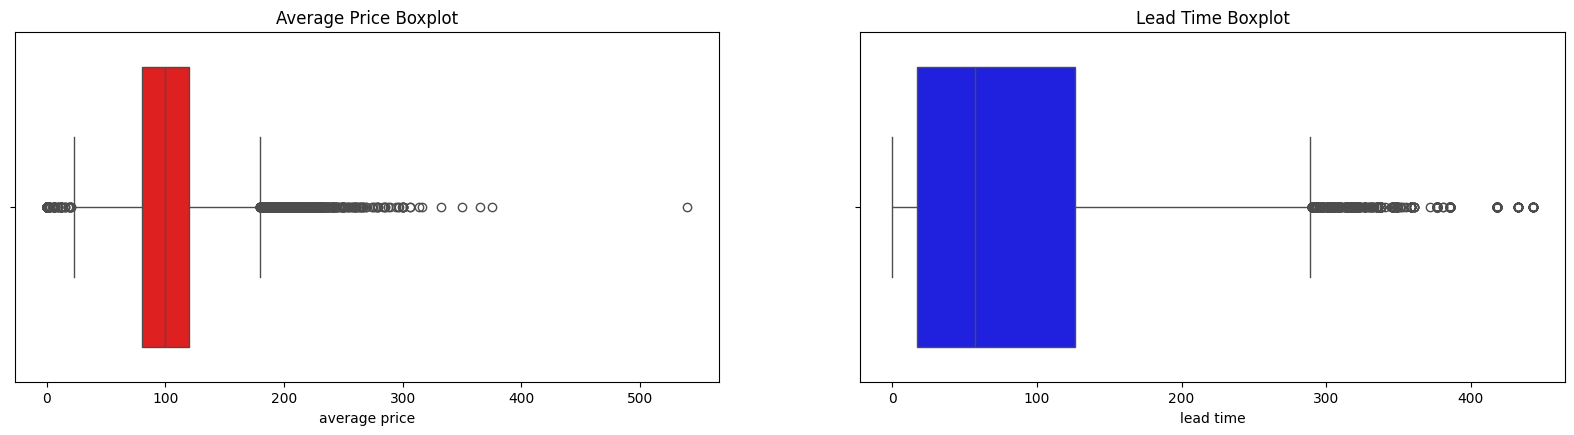

In [15]:
# Check outliers average price, lead time, number of children, number of adults
plt.figure(figsize=(20, 10))    
plt.subplot(2, 2, 1)
sns.boxplot(x=data_cleaned['average price'], color='red')
plt.title('Average Price Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(x=data_cleaned['lead time'], color='blue')
plt.title('Lead Time Boxplot')

1. Handling Lead Time Outlies

C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\1464515292.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '75.92778874488599' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['lead time'] > upper_bound, 'lead time'] = mean_lead_time


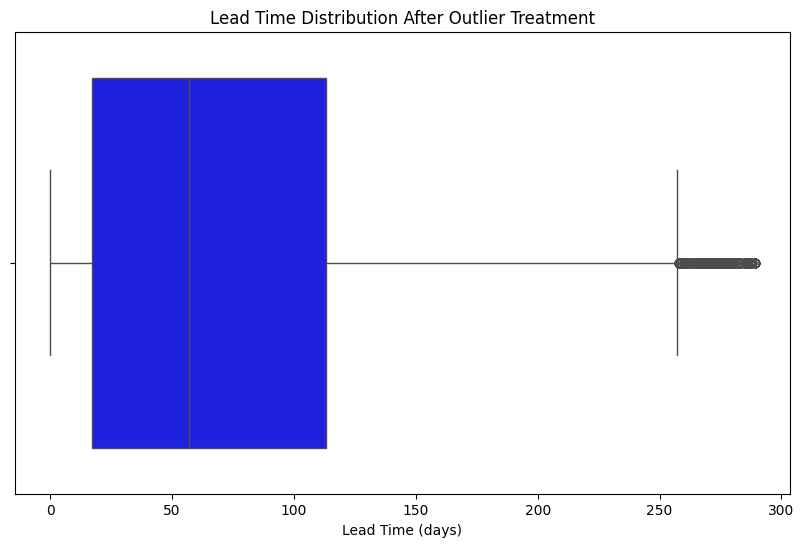

In [16]:
# Calculate mean lead time excluding outliers
q1 = data['lead time'].quantile(0.25)
q3 = data['lead time'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Calculate mean of non-outlier values
non_outlier_mask = (data['lead time'] >= lower_bound) & (data['lead time'] <= upper_bound)
mean_lead_time = data.loc[non_outlier_mask, 'lead time'].mean()

# Fill outliers with mean of non-outlier values
data.loc[data['lead time'] > upper_bound, 'lead time'] = mean_lead_time
data.loc[data['lead time'] < lower_bound, 'lead time'] = mean_lead_time

# Create figure and axis objects with desired size
plt.figure(figsize=(10, 6))

# Create boxplot
sns.boxplot(x=data['lead time'], color='blue')
plt.title('Lead Time Distribution After Outlier Treatment')
plt.xlabel('Lead Time (days)')
plt.show()

2. Handling Average Price Outliers

In [17]:
# Check counts of suspicious prices
print("Count of prices less than 25:", (data['average price'] < 25).sum())
print("Count of complementry reservations:", ((data['market segment type'] == 'Complementary') & (data['average price'] < 25)).sum())

Count of prices less than 25: 628
Count of complementry reservations: 375


In [18]:
def find_similar_bookings(row, segment_data, exclude_index):
    """
    Find similar bookings based on booking conditions
    Returns the mean price of similar bookings
    """
    # Define the features that make bookings similar
    similar_conditions = (
        (segment_data['number of adults'] == row['number of adults']) &
        (segment_data['number of children'] == row['number of children']) &
        (segment_data['number of weekend nights'] == row['number of weekend nights']) &
        (segment_data['number of week nights'] == row['number of week nights']) &
        (segment_data['room type'] == row['room type']) &
        (segment_data['type of meal'] == row['type of meal']) &
        (segment_data.index != exclude_index)  # Exclude the current booking
    )
    
    similar_bookings = segment_data[similar_conditions]
    
    # If we find similar bookings with non-zero prices, use their mean
    valid_prices = similar_bookings[similar_bookings['average price'] > 0]['average price']
    if len(valid_prices) > 0:
        return valid_prices.mean()
    
    # If no exact matches, relax conditions
    relaxed_conditions = (
        (segment_data['room type'] == row['room type']) &
        ((segment_data['number of adults'] + segment_data['number of children']) == (row['number of adults'] + row['number of children'])) &
        ((segment_data['number of week nights'] + segment_data['number of weekend nights']) == (row['number of week nights'] + row['number of weekend nights'])) &
        (segment_data.index != exclude_index)
    )
    
    relaxed_similar = segment_data[relaxed_conditions]
    valid_relaxed_prices = relaxed_similar[relaxed_similar['average price'] > 0]['average price']
    
    if len(valid_relaxed_prices) > 0:
        return valid_relaxed_prices.mean()
    
    # If still no matches, use the segment mean
    segment_mean = segment_data[segment_data['average price'] > 0]['average price'].mean()
    return segment_mean

In [19]:
# Process each market segment separately
segments = ['Online', 'Offline', 'Corporate', 'Aviation', 'Complementary']

for segment in segments:
    segment_data = data[data['market segment type'] == segment].copy()
    
    # Skip Complementary segment for zero prices as they might be valid
    if segment != 'Complementary':
        # Calculate segment-specific statistics
        q1 = segment_data['average price'].quantile(0.25)
        q3 = segment_data['average price'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = max(10, q1 - 1.5 * iqr)
        upper_bound = q3 + 1.5 * iqr
        
        # Find outliers
        outlier_indices = segment_data[
            (segment_data['average price'] < lower_bound) |
            (segment_data['average price'] > upper_bound)
        ].index
        
        # Replace outliers with prices from similar bookings
        for idx in outlier_indices:
            similar_price = find_similar_bookings(
                data.loc[idx],
                segment_data,
                idx
            )
            data_cleaned.loc[idx, 'average price'] = similar_price


Statistics for Online:
Count: 23201
Mean price: 112.42
Min price: 35.20
Max price: 300.00


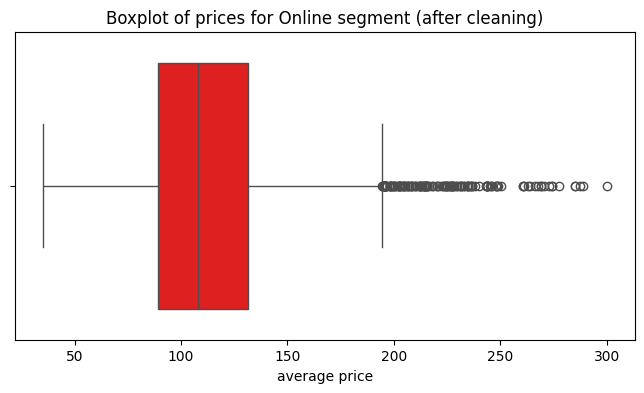


Statistics for Offline:
Count: 10521
Mean price: 90.69
Min price: 26.35
Max price: 184.50


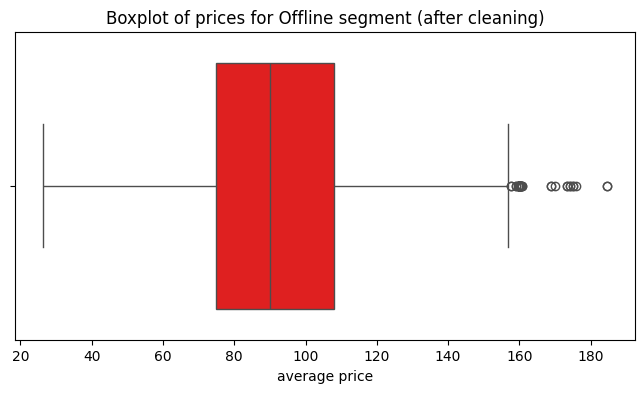


Statistics for Corporate:
Count: 2011
Mean price: 81.11
Min price: 31.00
Max price: 170.63


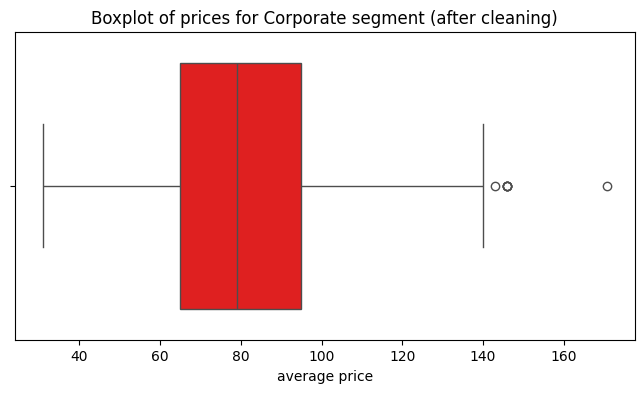


Statistics for Aviation:
Count: 125
Mean price: 100.70
Min price: 79.00
Max price: 110.00


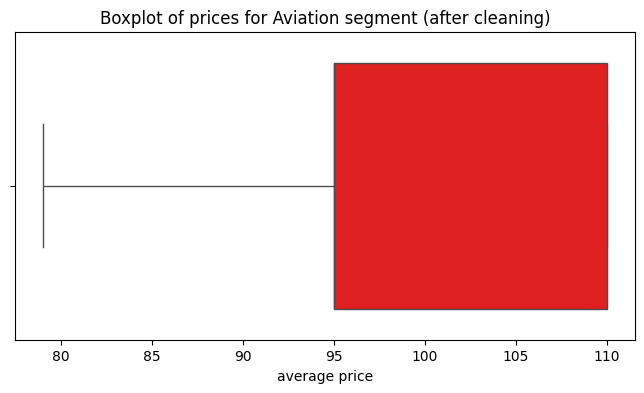


Statistics for Complementary:
Count: 390
Mean price: 3.14
Min price: 0.00
Max price: 170.00


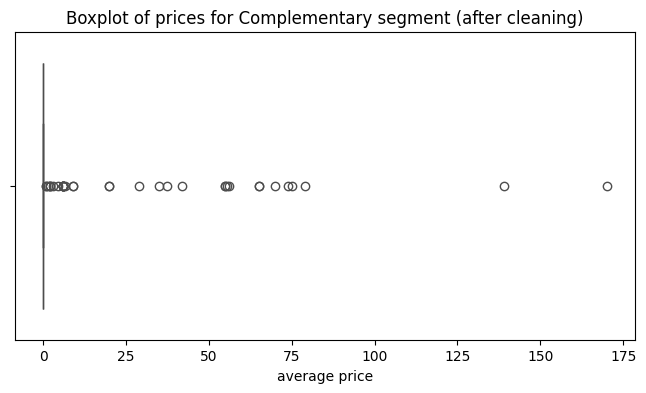

In [20]:
# Verify results
for segment in segments:
    segment_data = data_cleaned[data_cleaned['market segment type'] == segment]
    print(f"\nStatistics for {segment}:")
    print(f"Count: {len(segment_data)}")
    print(f"Mean price: {segment_data['average price'].mean():.2f}")
    print(f"Min price: {segment_data['average price'].min():.2f}")
    print(f"Max price: {segment_data['average price'].max():.2f}")
    
    # Create boxplot for each segment
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=segment_data, x='average price', color='red')
    plt.title(f'Boxplot of prices for {segment} segment (after cleaning)')
    plt.show()

---
### 5-Feature Engineering & Selection

In [21]:
#drop costing features which is "Booking_ID" coloumn & Save cleaned data to a new csv file
data_cleaned.drop('Booking_ID', axis=1 , inplace=True) 
data_cleaned.to_csv("first inten project_cleaned.csv", index=False)
data_cleaned.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,Old Customer,Previously Canceled,Previously not Canceled,average price,special requests,booking status,reservation_year,reservation_month,reservation_day
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2015,10,2
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018,11,6
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2018,2,28
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,2017,5,20
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,2018,4,11


##### Encoding of Strings values

In [22]:
le = LabelEncoder()
data_cleaned['room type'] = le.fit_transform(data_cleaned['room type'])
data_cleaned['type of meal'] = le.fit_transform(data_cleaned['type of meal'])
data_cleaned['market segment type'] = le.fit_transform(data_cleaned['market segment type'])
data_cleaned['booking status'] = le.fit_transform(data_cleaned['booking status'])


In [23]:
data_cleaned['total nights'] = data_cleaned['number of weekend nights'] + data_cleaned['number of week nights']

In [24]:
data_cleaned.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,Old Customer,Previously Canceled,Previously not Canceled,average price,special requests,booking status,reservation_year,reservation_month,reservation_day,total nights
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,1,2015,10,2,7
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,1,2018,11,6,4
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,0,2018,2,28,4
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,0,2017,5,20,2
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,0,2018,4,11,3


##### Draw correlation matrix 

In [25]:
correlation_matrix = data_cleaned.corr()
correlation_with_price = correlation_matrix['average price'].abs().sort_values(ascending=False)
print(correlation_with_price)

average price               1.000000
room type                   0.474899
market segment type         0.428317
number of children          0.335245
number of adults            0.297440
special requests            0.194594
Old Customer                0.187450
reservation_year            0.184502
booking status              0.141506
Previously not Canceled     0.123612
Previously Canceled         0.068468
type of meal                0.067912
lead time                   0.062102
car parking space           0.060161
reservation_month           0.050468
number of weekend nights    0.017087
number of week nights       0.010383
reservation_day             0.008188
total nights                0.000130
Name: average price, dtype: float64


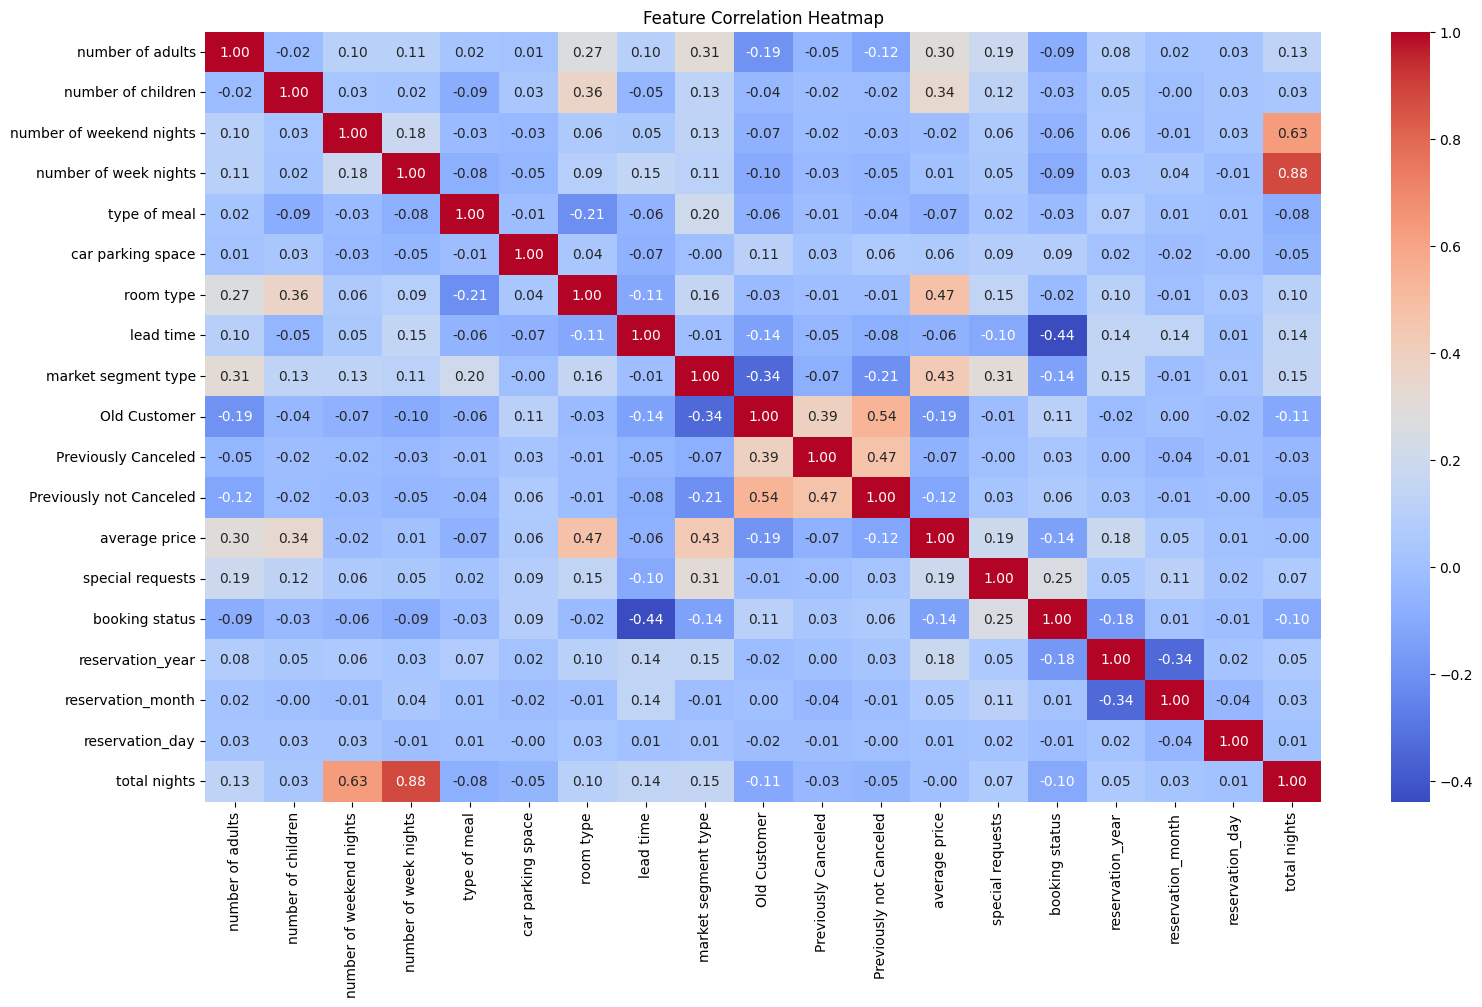

In [26]:
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

---

### Informative Graphics and Insights


In [27]:
# copy data_encoded to data_encoded_copy
data_copy = data_cleaned.copy()


In [28]:
market_segment_mapping = {
    0: "Aviation",
    1: "Complementary",
    2: "Corporate",
    3: "Offline",
    4: "Online"
}

Room_mapping = {
    0: "Room type 1",
    1: "Room type 2",
    2: "Room type 3",
    3: "Room type 4",
    4: "Room type 5",
    5: "Room type 6",
    6: "Room type 7"
}

1. Average Price Insights

C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\221175125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number of adults', y='average price', data=data_copy, palette='viridis')
C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\221175125.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number of children', y='average price', data=data_copy, palette='viridis')
C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\221175125.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market segment type', y='average price', data=dat

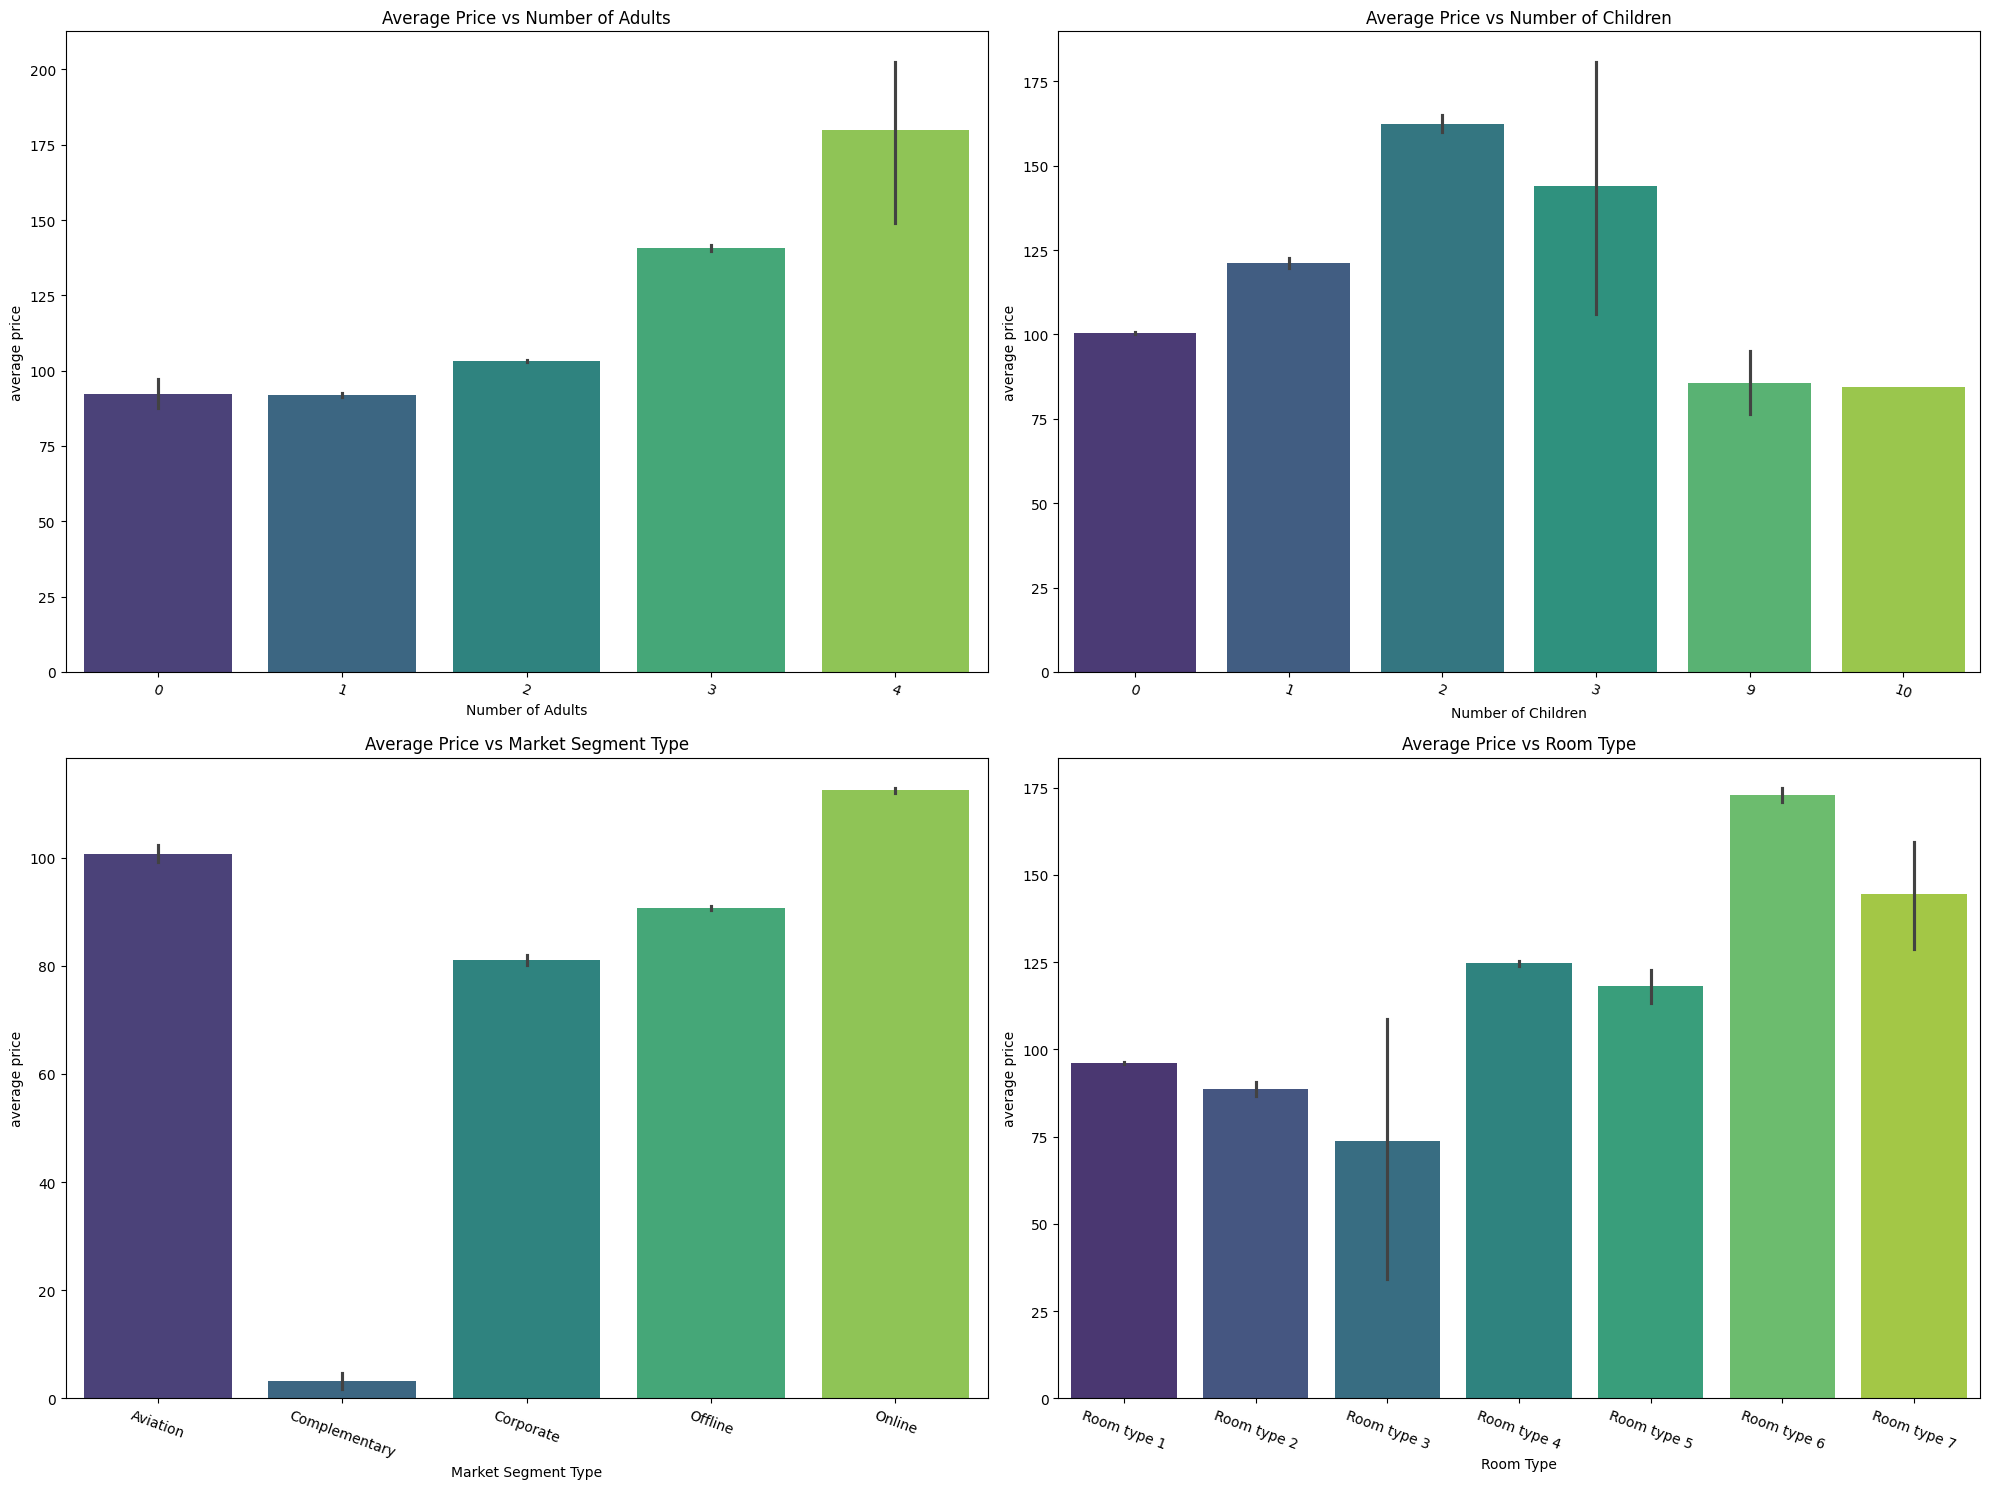

In [29]:
# Avg price versus number of adults, number of children, market segment type and room type
plt.figure(figsize=(20, 15))

# Plot 1: Average Price vs Number of Adults
plt.subplot(2, 2, 1)
sns.barplot(x='number of adults', y='average price', data=data_copy, palette='viridis')
plt.title('Average Price vs Number of Adults')
plt.xlabel('Number of Adults')
plt.xticks(rotation=-20)

# Plot 2: Average Price vs Number of Children
plt.subplot(2, 2, 2)
sns.barplot(x='number of children', y='average price', data=data_copy, palette='viridis')
plt.title('Average Price vs Number of Children')
plt.xlabel('Number of Children')
plt.xticks(rotation=-20)

# Plot 3: Average Price vs Market Segment Type
plt.subplot(2, 2, 3)
sns.barplot(x='market segment type', y='average price', data=data_copy, palette='viridis')
plt.title('Average Price vs Market Segment Type')
plt.xlabel('Market Segment Type')
plt.xticks(ticks=range(len(market_segment_mapping)), 
          labels=market_segment_mapping.values(), 
          rotation=-20)

# Plot 4: Average Price vs Room Type
plt.subplot(2, 2, 4)
sns.barplot(x='room type', y='average price', data=data_copy, palette='viridis')
plt.title('Average Price vs Room Type')
plt.xlabel('Room Type')
plt.xticks(ticks=range(len(Room_mapping)), 
          labels=Room_mapping.values(), 
          rotation=-20)

plt.tight_layout()
plt.show()


2. Market segment type Insights

C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\2336154600.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_adults.index, y=avg_adults.values, palette='viridis')
C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\2336154600.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_copy['market segment type'], y='average price', data=data_copy, palette='viridis')
C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\2336154600.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_copy['market segment type'], y='special reque

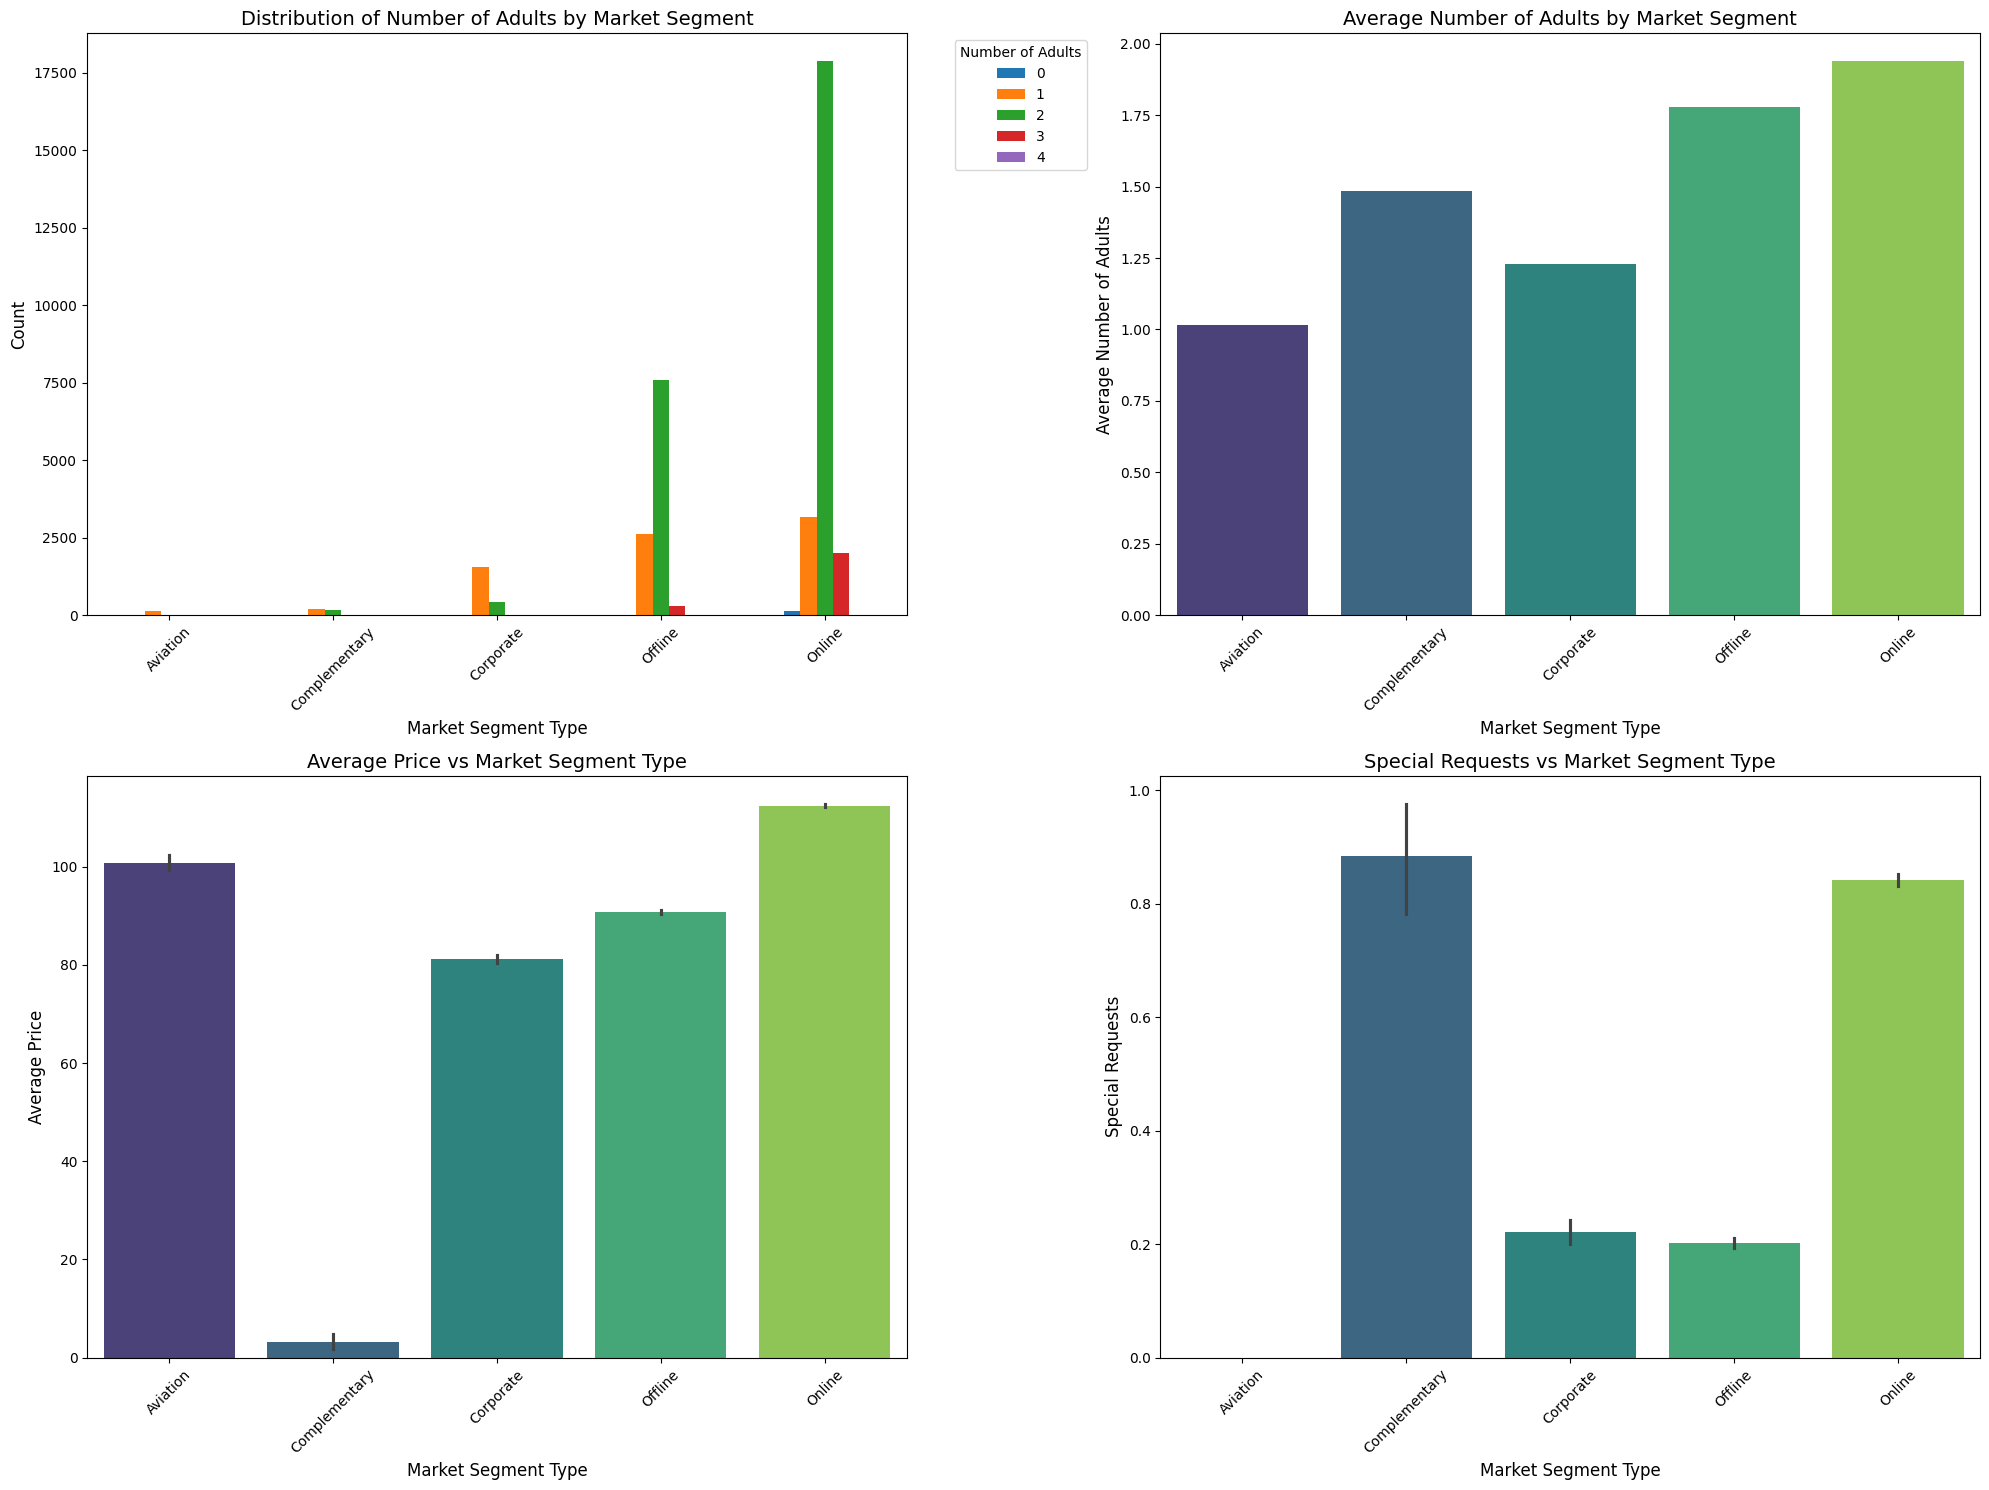

In [30]:
# Market segment type versus no of adults, average price and special request
plt.figure(figsize=(20, 15))

# Plot 1: Distribution of Number of Adults by Market Segment
plt.subplot(2, 2, 1)
adult_counts = data_copy.groupby(['market segment type', 'number of adults']).size().unstack()
adult_counts.plot(kind='bar', ax=plt.gca())
plt.title('Distribution of Number of Adults by Market Segment', fontsize=14)
plt.xlabel('Market Segment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Number of Adults', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(len(market_segment_mapping)), labels=market_segment_mapping.values(), rotation=45)

# Plot 2: Average Number of Adults by Market Segment
plt.subplot(2, 2, 2)
avg_adults = data_copy.groupby('market segment type')['number of adults'].mean()
sns.barplot(x=avg_adults.index, y=avg_adults.values, palette='viridis')
plt.title('Average Number of Adults by Market Segment', fontsize=14)
plt.xlabel('Market Segment Type', fontsize=12)
plt.ylabel('Average Number of Adults', fontsize=12)
plt.xticks(ticks=range(len(market_segment_mapping)), labels=market_segment_mapping.values(), rotation=45)

# Plot 3: Average Price vs Market Segment Type
plt.subplot(2, 2, 3)
sns.barplot(x=data_copy['market segment type'], y='average price', data=data_copy, palette='viridis')
plt.title('Average Price vs Market Segment Type', fontsize=14)
plt.xlabel('Market Segment Type', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(ticks=range(len(market_segment_mapping)), labels=market_segment_mapping.values(), rotation=45)

# Plot 4: Special Requests vs Market Segment Type
plt.subplot(2, 2, 4)
sns.barplot(x=data_copy['market segment type'], y='special requests', data=data_copy, palette='viridis')
plt.title('Special Requests vs Market Segment Type', fontsize=14)
plt.xlabel('Market Segment Type', fontsize=12)
plt.ylabel('Special Requests', fontsize=12)
plt.xticks(ticks=range(len(market_segment_mapping)), labels=market_segment_mapping.values(), rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

3. Old customer Insights

C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\2371727220.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(len(room_stats)), y=room_stats[('average price', 'mean')], palette='viridis')


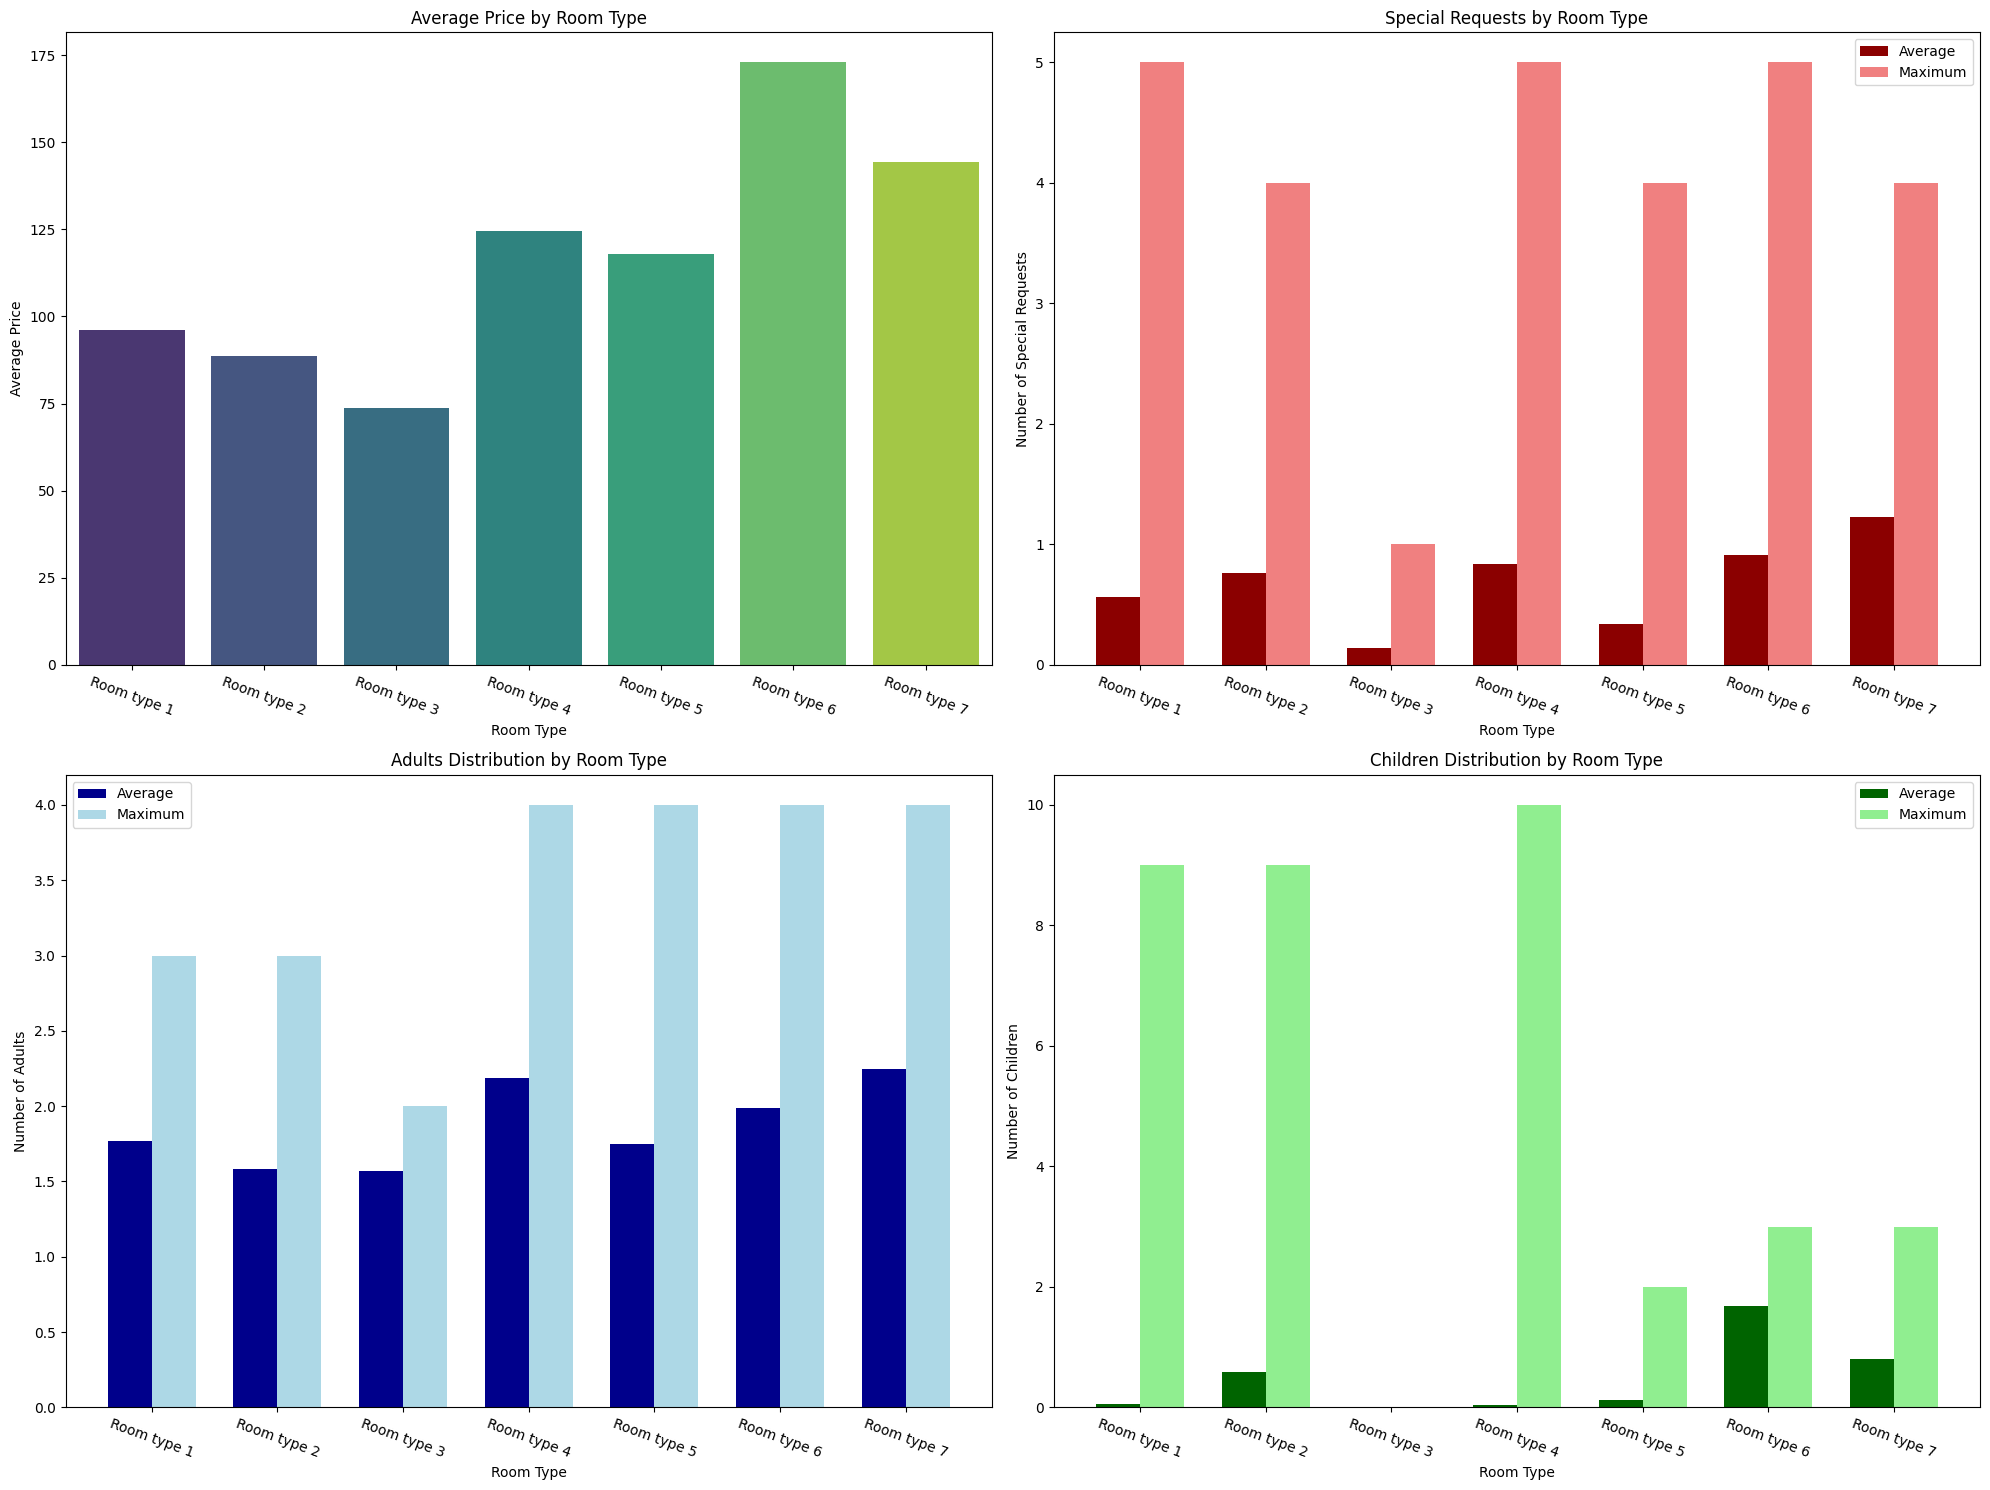

In [31]:
# Create a figure with multiple subplots
plt.figure(figsize=(20, 15))

# Calculate statistics for each room type separately
room_stats = data_copy.groupby('room type').agg({
    'average price': 'mean',
    'number of adults': ['mean', 'max'],
    'number of children': ['mean', 'max'],
    'special requests': ['mean', 'max']
}).round(2)

# Plot 1: Average Price vs Room Type
plt.subplot(2, 2, 1)
sns.barplot(x=range(len(room_stats)), y=room_stats[('average price', 'mean')], palette='viridis')
plt.title('Average Price by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(range(len(room_stats)), Room_mapping.values(), rotation=-20)

# Plot 2: Special Requests Distribution by Room Type
plt.subplot(2, 2, 2)
ax = plt.gca()
x = np.arange(len(room_stats))
width = 0.35
ax.bar(x - width/2, room_stats[('special requests', 'mean')], width, label='Average', color='darkred')
ax.bar(x + width/2, room_stats[('special requests', 'max')], width, label='Maximum', color='lightcoral')
plt.title('Special Requests by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Number of Special Requests')
plt.legend()
plt.xticks(x, Room_mapping.values(), rotation=-20)

# Plot 3: Number of Adults Distribution by Room Type
plt.subplot(2, 2, 3)
ax = plt.gca()
ax.bar(x - width/2, room_stats[('number of adults', 'mean')], width, label='Average', color='darkblue')
ax.bar(x + width/2, room_stats[('number of adults', 'max')], width, label='Maximum', color='lightblue')
plt.title('Adults Distribution by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Number of Adults')
plt.legend()
plt.xticks(x, Room_mapping.values(), rotation=-20)

# Plot 4: Number of Children Distribution by Room Type
plt.subplot(2, 2, 4)
ax = plt.gca()
ax.bar(x - width/2, room_stats[('number of children', 'mean')], width, label='Average', color='darkgreen')
ax.bar(x + width/2, room_stats[('number of children', 'max')], width, label='Maximum', color='lightgreen')
plt.title('Children Distribution by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Number of Children')
plt.legend()
plt.xticks(x, Room_mapping.values(), rotation=-20)

plt.tight_layout()
plt.show()


4. Room type Insights

C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\3876362051.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(len(room_stats)), y=room_stats[('average price', 'mean')], palette='viridis')


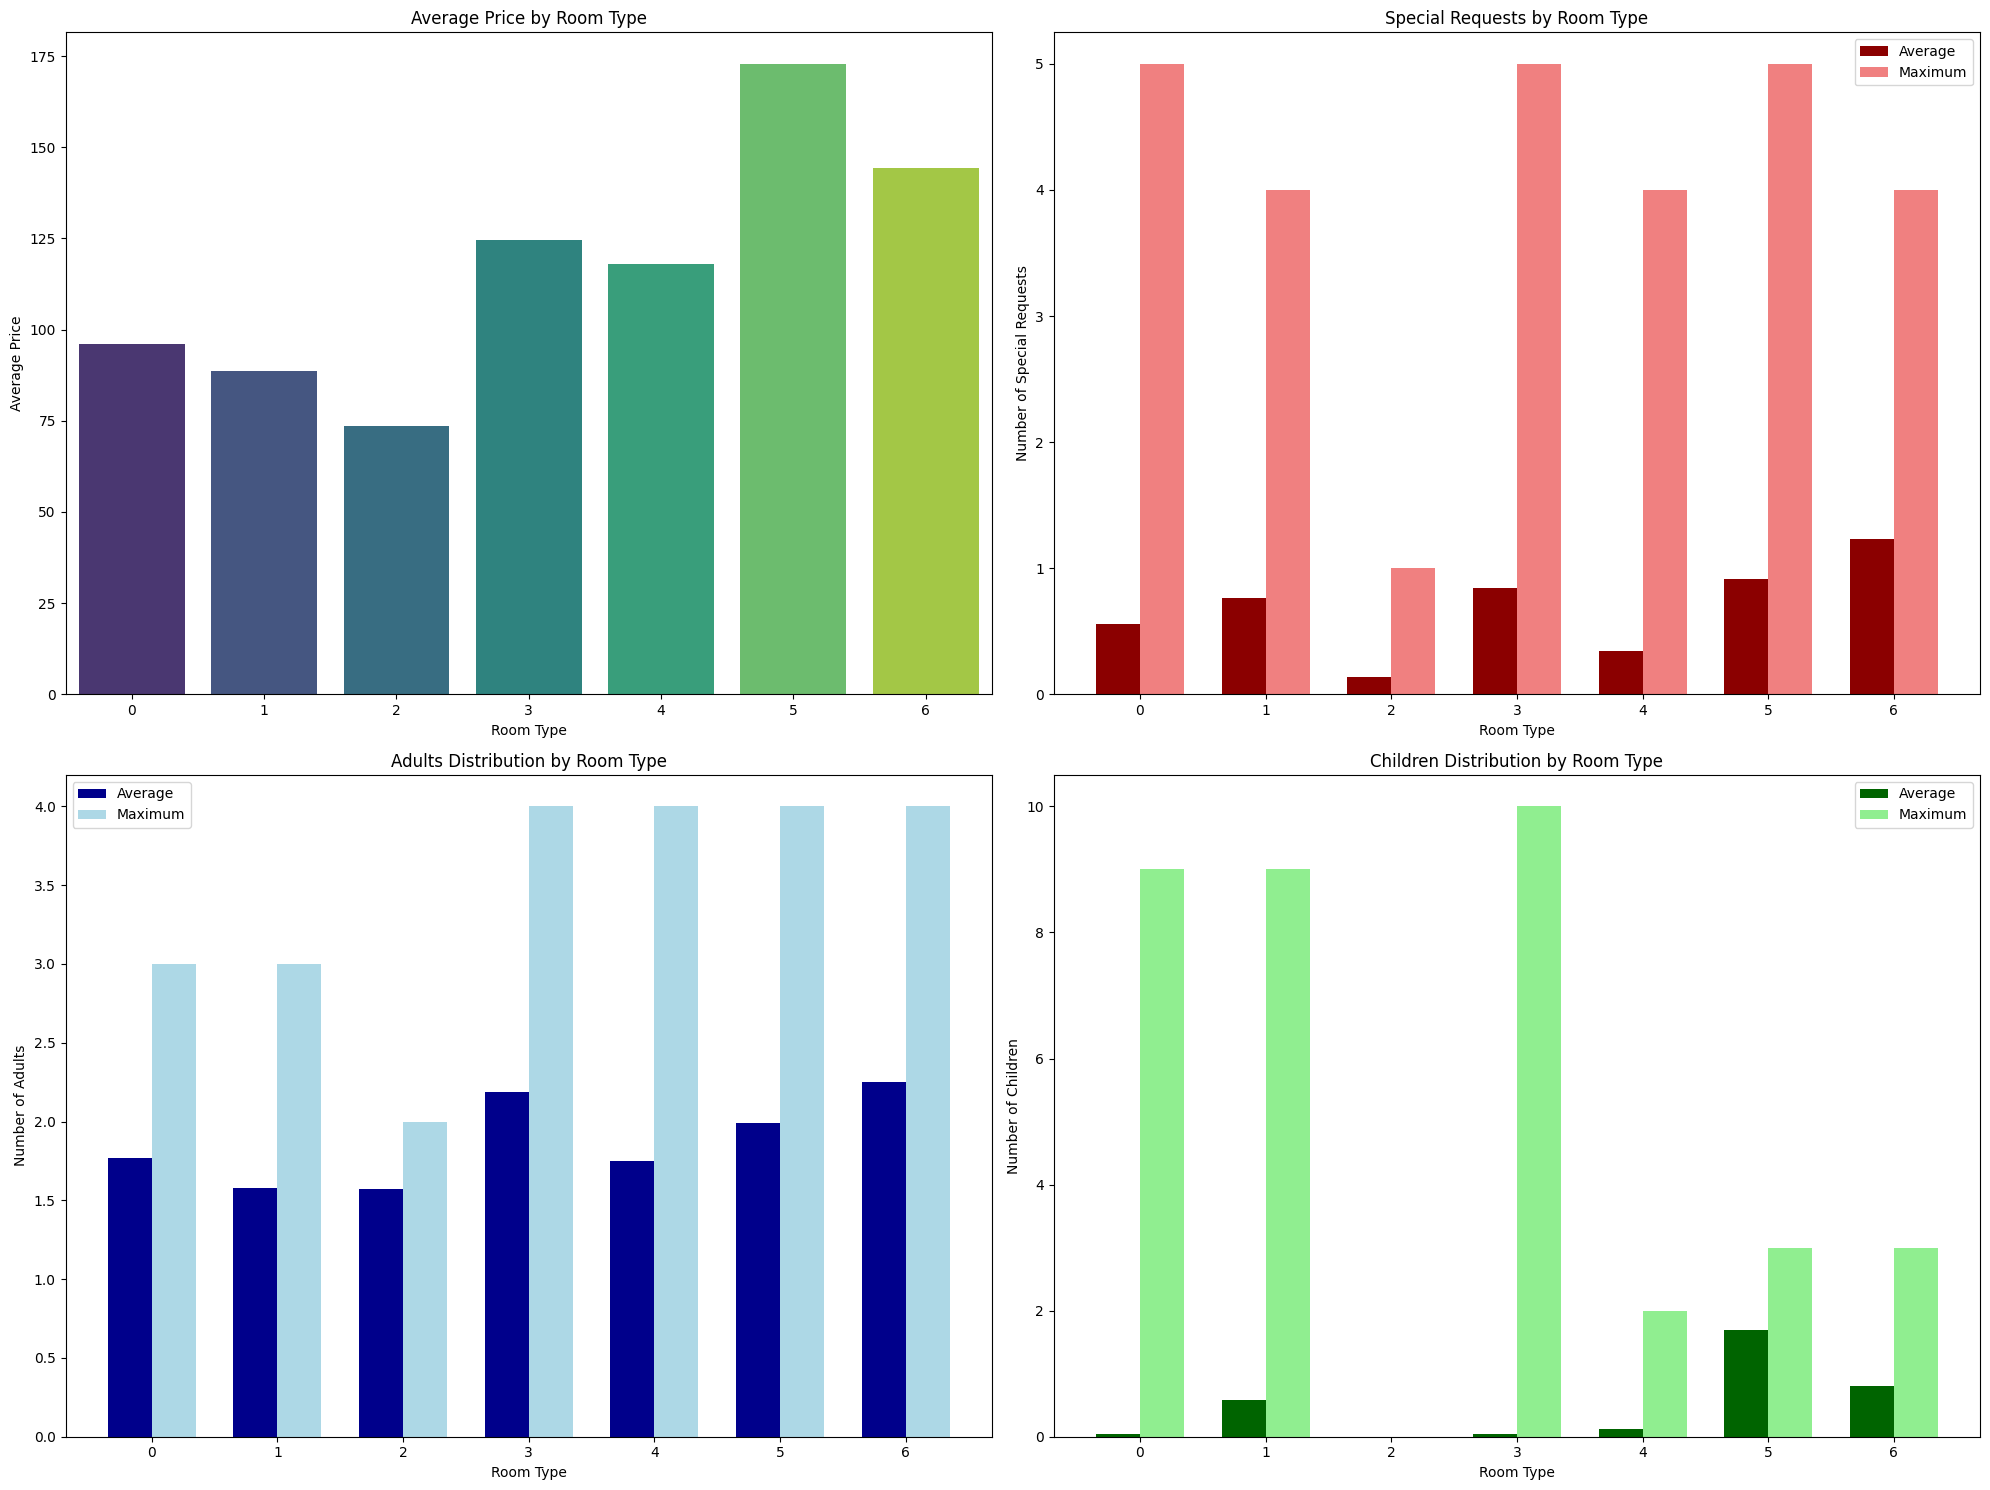

In [32]:
# Create a figure with multiple subplots
plt.figure(figsize=(20, 15))

# Calculate statistics for each room type separately
room_stats = data_copy.groupby('room type').agg({
    'average price': 'mean',
    'number of adults': ['mean', 'max'],
    'number of children': ['mean', 'max'],
    'special requests': ['mean', 'max']
}).round(2)

# Plot 1: Average Price vs Room Type
plt.subplot(2, 2, 1)
sns.barplot(x=range(len(room_stats)), y=room_stats[('average price', 'mean')], palette='viridis')
plt.title('Average Price by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(range(len(room_stats)), range(len(room_stats)))

# Plot 2: Special Requests Distribution by Room Type
plt.subplot(2, 2, 2)
ax = plt.gca()
x = np.arange(len(room_stats))
width = 0.35
ax.bar(x - width/2, room_stats[('special requests', 'mean')], width, label='Average', color='darkred')
ax.bar(x + width/2, room_stats[('special requests', 'max')], width, label='Maximum', color='lightcoral')
plt.title('Special Requests by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Number of Special Requests')
plt.legend()
plt.xticks(x, range(len(room_stats)))

# Plot 3: Number of Adults Distribution by Room Type
plt.subplot(2, 2, 3)
ax = plt.gca()
ax.bar(x - width/2, room_stats[('number of adults', 'mean')], width, label='Average', color='darkblue')
ax.bar(x + width/2, room_stats[('number of adults', 'max')], width, label='Maximum', color='lightblue')
plt.title('Adults Distribution by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Number of Adults')
plt.legend()
plt.xticks(x, range(len(room_stats)))

# Plot 4: Number of Children Distribution by Room Type
plt.subplot(2, 2, 4)
ax = plt.gca()
ax.bar(x - width/2, room_stats[('number of children', 'mean')], width, label='Average', color='darkgreen')
ax.bar(x + width/2, room_stats[('number of children', 'max')], width, label='Maximum', color='lightgreen')
plt.title('Children Distribution by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Number of Children')
plt.legend()
plt.xticks(x, range(len(room_stats)))

plt.tight_layout()
plt.show()


5. Plots to show profits and reservations with dates

C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\902624655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reservation_year', data=data_copy, palette='viridis')


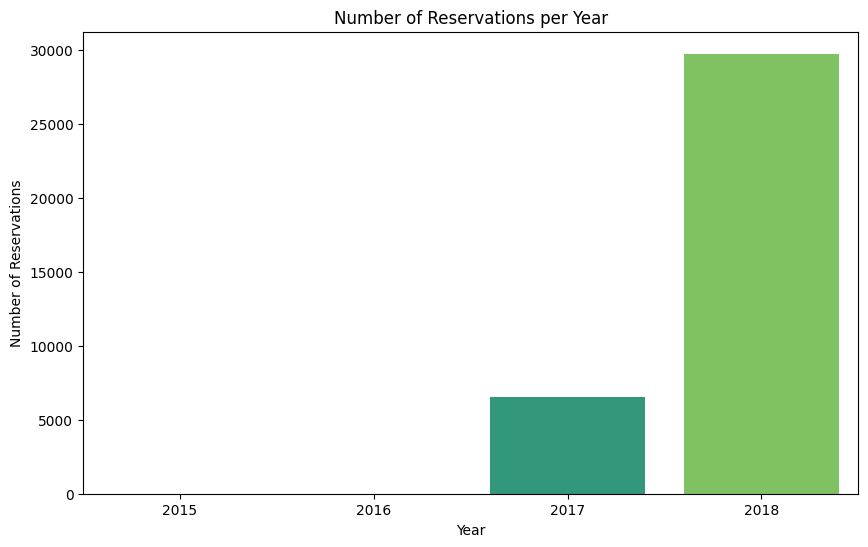

C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\902624655.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reservation_month', data=data_copy, palette='viridis')


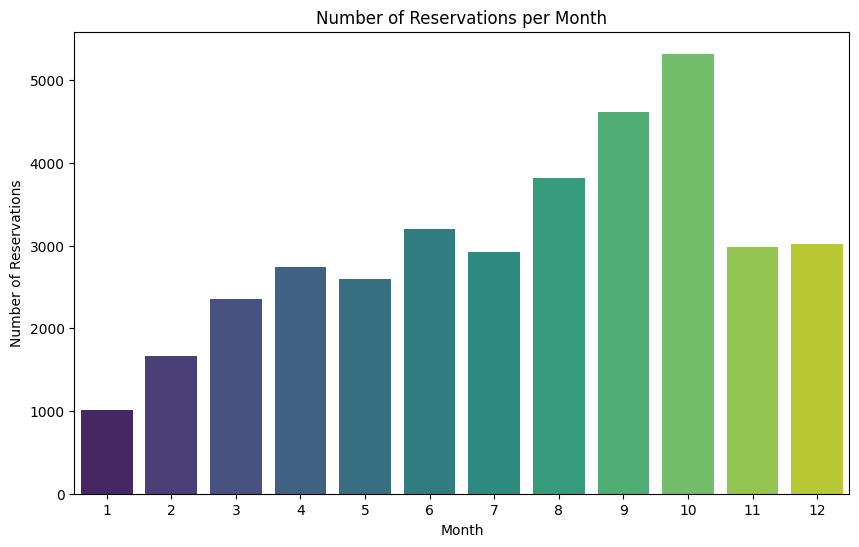

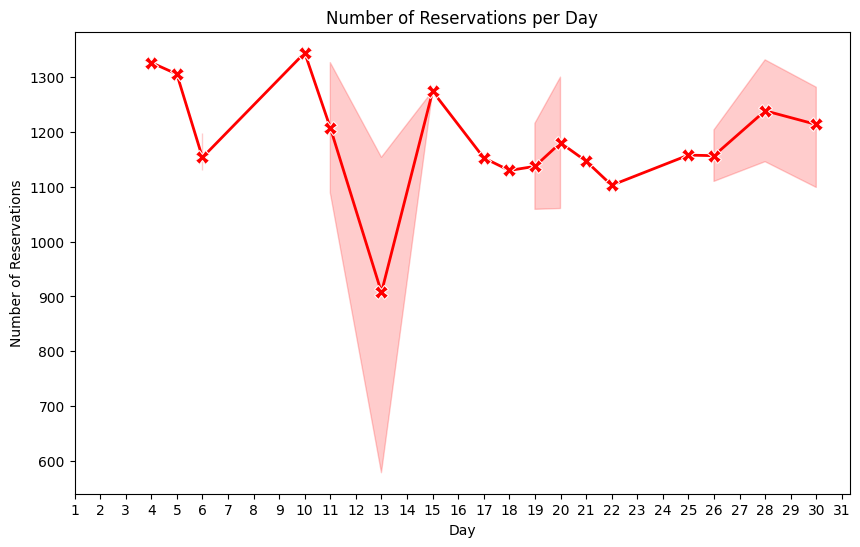

In [33]:
# Year wise reservations
plt.figure(figsize=(10, 6))
sns.countplot(x='reservation_year', data=data_copy, palette='viridis')
plt.title('Number of Reservations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reservations')
plt.show()

# Month wise reservations
plt.figure(figsize=(10, 6))
sns.countplot(x='reservation_month', data=data_copy, palette='viridis')
plt.title('Number of Reservations per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.show()

# Day wise reservations using a line plot for better clarity
plt.figure(figsize=(10, 6))
sns.lineplot(x='reservation_day', y=data_copy['reservation_day'].value_counts().sort_index(), data=data_cleaned, marker='X' , color='red', markersize=10 , linewidth=2)
plt.title('Number of Reservations per Day')
plt.xlabel('Day')
plt.ylabel('Number of Reservations')
plt.xticks(range(1, 32))
plt.show()



6. What is the most common booking channel?

C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\1111205682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_cleaned["market segment type"], palette='magma')


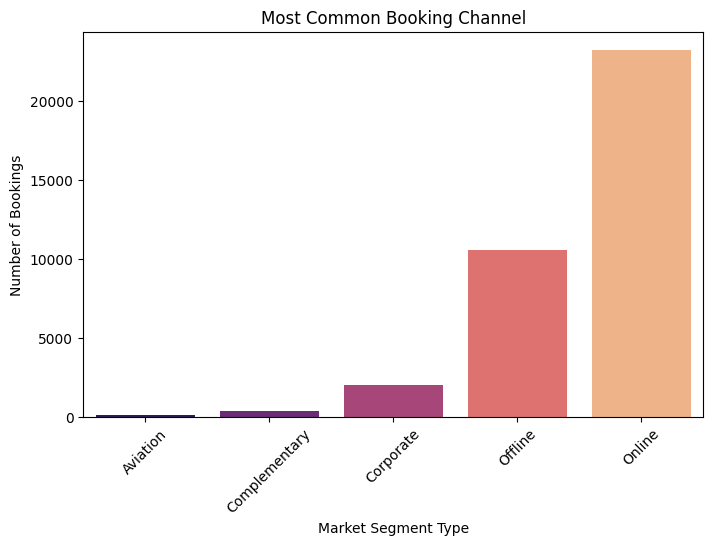

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data_cleaned["market segment type"], palette='magma')
plt.xlabel("Market Segment Type")
plt.ylabel("Number of Bookings")
plt.title("Most Common Booking Channel")
plt.xticks(ticks=list(market_segment_mapping.keys()), labels=list(market_segment_mapping.values()), rotation=45)
plt.show()

7.  How does lead time impact booking status?

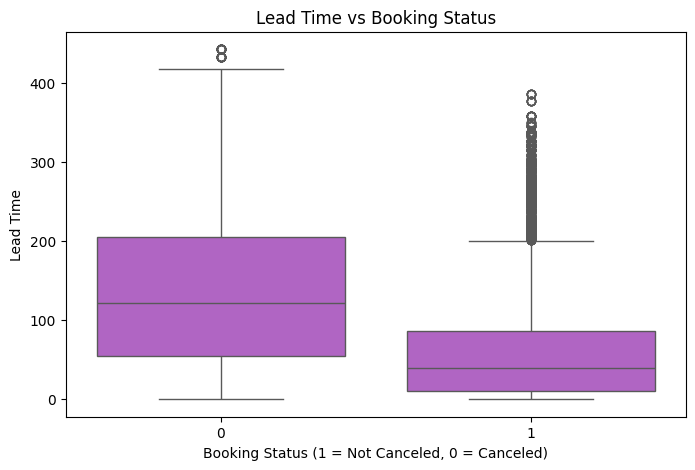

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_cleaned["booking status"], y=data_cleaned["lead time"], color='mediumorchid')
plt.xlabel("Booking Status (1 = Not Canceled, 0 = Canceled)")
plt.ylabel("Lead Time")
plt.title("Lead Time vs Booking Status")
plt.show()

8. What is the trend of hotel bookings over time?

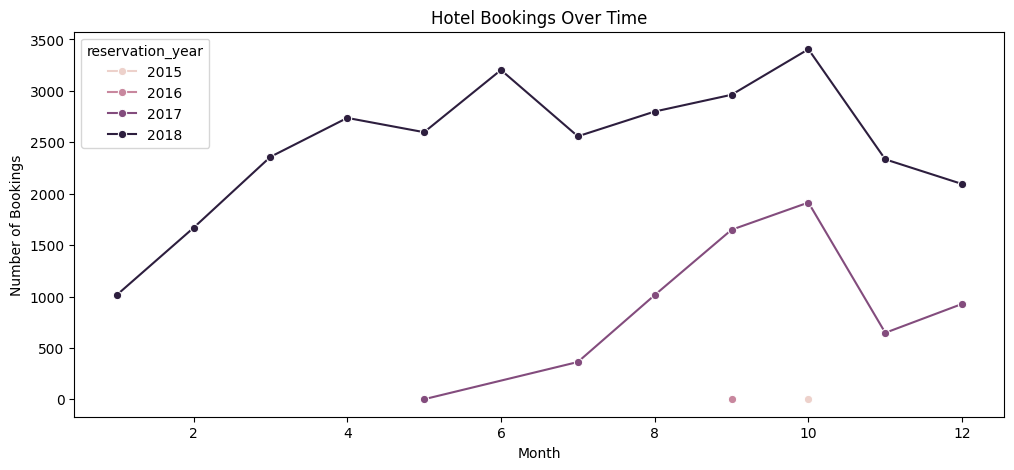

In [36]:
monthly_bookings = data_copy.groupby(["reservation_year", "reservation_month"]).size().reset_index(name="bookings")

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_bookings, x="reservation_month", y="bookings", hue="reservation_year", marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Hotel Bookings Over Time")
plt.show()

9. What is the average price per market segment?

C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\4019509327.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_segment.index, y=avg_price_per_segment.values, palette='magma')


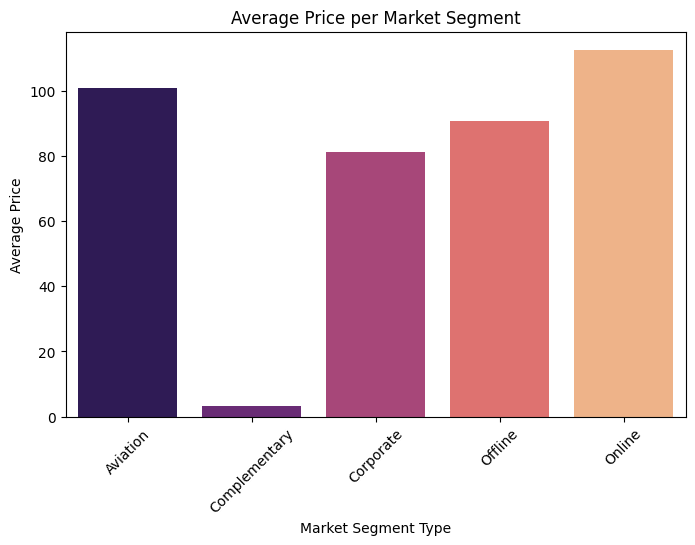

In [37]:
avg_price_per_segment = data_cleaned.groupby("market segment type")["average price"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_per_segment.index, y=avg_price_per_segment.values, palette='magma')
plt.xlabel("Market Segment Type")
plt.ylabel("Average Price")
plt.title("Average Price per Market Segment")
plt.xticks(ticks=list(market_segment_mapping.keys()), labels=list(market_segment_mapping.values()), rotation=45)
plt.show()

10. What is the most common room type booked?

C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\2929784910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_cleaned["room type"], palette='magma')


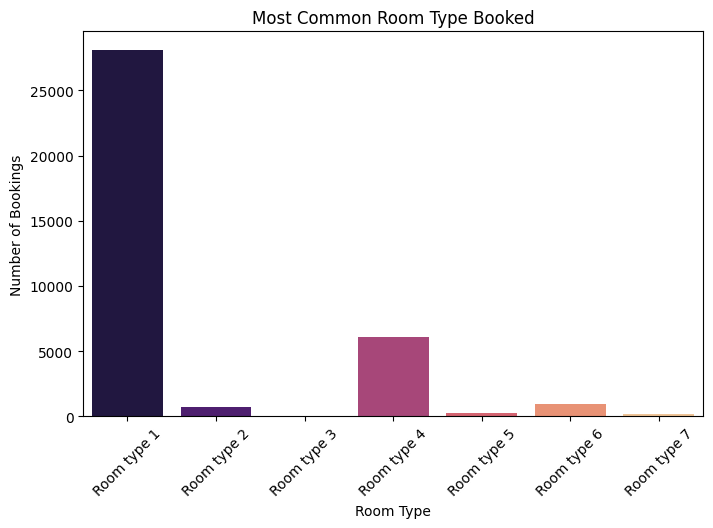

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data_cleaned["room type"], palette='magma')
plt.xlabel("Room Type")
plt.ylabel("Number of Bookings")
plt.title("Most Common Room Type Booked")
plt.xticks(ticks=list(Room_mapping.keys()), labels=list(Room_mapping.values()), rotation=45)
plt.show()

11. How does meal type preference vary across bookings?

In [39]:
Meal_mapping = {
    0: "Plan 1",
    1: "Plan 2",
    2: "Plan 3",
    3: "Not Selected"
}

C:\Users\Habiba\AppData\Local\Temp\ipykernel_20544\1937785810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_cleaned["type of meal"], palette='magma')


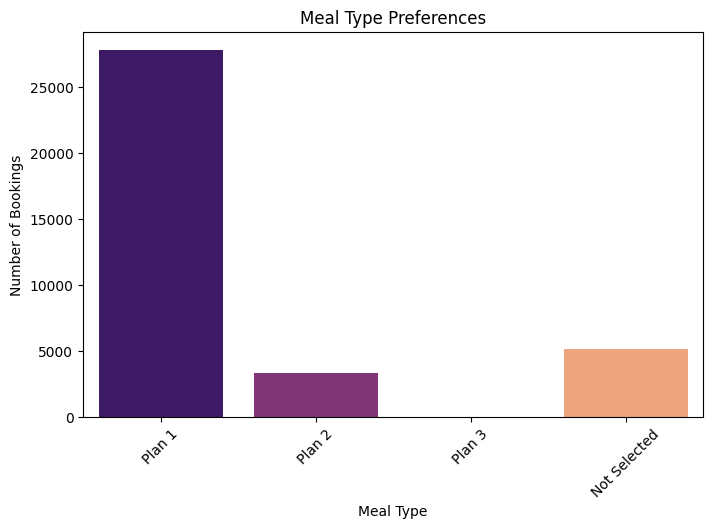

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data_cleaned["type of meal"], palette='magma')
plt.xlabel("Meal Type")
plt.ylabel("Number of Bookings")
plt.title("Meal Type Preferences")
plt.xticks(ticks=list(Meal_mapping.keys()), labels=list(Meal_mapping.values()), rotation=45)
plt.show()

In [41]:
# Drop weak features (correlation ≈ 0) and features that cause redundancy
features_to_drop = [
    "number of weekend nights", "number of week nights",
    "Previously Canceled", "Previously not Canceled",
    "reservation_day",
]

# Drop weak features
cleaned_data = data_cleaned.drop(columns=features_to_drop)

# Verify the remaining columns
cleaned_data.head()

,number of adults,number of children,type of meal,car parking space,room type,lead time,market segment type,Old Customer,average price,special requests,booking status,reservation_year,reservation_month,total nights
0,1,1,0,0,0,224,3,0,88.00,0,1,2015,10,7
1,1,0,3,0,0,5,4,0,106.68,1,1,2018,11,4
2,2,1,0,0,0,1,4,0,50.00,0,0,2018,2,4
3,1,0,0,0,0,211,4,0,100.00,1,0,2017,5,2
4,1,0,3,0,0,48,4,0,77.00,0,0,2018,4,3
